In this project, you are going to work on the The "Census Income" data set from the UCI Machine Learning Repository that contains
the income information for over 48,000 individuals taken from the 1994 US For more details about this dataset, you can refer to the following link: https://archive.ics.uci.edu/ml/datasets/census+income
In this project, initially you need to preprocess the data and then develop an understanding of different features of the data by
performing exploratory analysis and creating visualizations.Further, after having sufficient knowledge about the attributes you will
perform a predictive task of classification to predict whether an individual makes over 50K a year or less,by using different Machine Learning Algorithms.

In [ ]:
import pandas as pd
census = pd.read_csv('/content/census-income.csv')

census.fillna('NA', inplace=True)

census.dropna(axis=0, inplace=True)


In [ ]:
census.columns.values[-1] = 'income'

In [ ]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
census.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [ ]:
# a) Extract the "education" column
census_ed = census[' education']

# b) Extract columns from "age" to "relationship"
census_seq = census.loc[:, 'age':' relationship']

# c) Extract specific columns
census_col = census.iloc[:, [5, 8, 11]]

# d) Extract male employees working in state-gov
male_gov = census[(census[' sex'] == 'Male') & (census[' workclass'] == 'state-gov')]

# e) Extract 39 year olds with bachelor's degree or native of the US
census_us = census[(census['age'] == 39) & ((census[' education'] == 'Bachelors') | (census[' native-country'] == 'United-States'))]

# f) Extract 200 random rows
census_200 = census.sample(n=200)

# g) Count levels of the "workclass" column
workclass_counts = census[' workclass'].value_counts()

# h) Calculate mean of "capital.gain" grouped by "workclass"
capital_gain_mean = census.groupby(' workclass')[' capital-gain'].mean()

# i) Create a dataframe for males and females with income > 50,000
high_income_df = census[(census['income'] == '>50K')]

# j) Percentage of people from the United States who are private employees and earn < 50,000
us_private_percentage = (census[(census[' native-country'] == 'United-States') & (census[' workclass'] == 'Private') & (census['income'] == '<=50K')].shape[0] / census.shape[0]) * 100

# k) Percentage of married people
married_percentage = (census[census[' marital-status'].str.startswith('Married')].shape[0] / census.shape[0]) * 100

# l) Percentage of high school graduates earning > 50,000
high_school_percentage = (census[(census[' education'] == 'HS-grad') & (census['income'] == '>50K')].shape[0] / census.shape[0]) * 100


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print(census.columns)

# Divide dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(census[[' education-num']], census[' hours-per-week'], test_size=0.3, random_state=42)

# Build linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on train set
train_predictions = linear_model.predict(X_train)

# Calculate RMSE
rmse = mean_squared_error(y_train, train_predictions, squared=False)

print(f"Root Mean Squared Error (RMSE): {rmse}")


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')
Root Mean Squared Error (RMSE): 12.153759081252302


In [ ]:
census.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd



# Divide dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(census[[' occupation']]), census['income'], test_size=0.35, random_state=42)

# Build logistic regression model
logistic_model_simple = LogisticRegression()
logistic_model_simple.fit(X_train, y_train)

# Predict on test set
test_predictions_simple = logistic_model_simple.predict(X_test)

# Build confusion matrix
conf_matrix_simple = confusion_matrix(y_test, test_predictions_simple)
accuracy_simple = accuracy_score(y_test, test_predictions_simple)

print("Confusion Matrix (Simple Logistic Regression):")
print(conf_matrix_simple)
print(f"Accuracy: {accuracy_simple}")


Confusion Matrix (Simple Logistic Regression):
[[8686    0]
 [2711    0]]
Accuracy: 0.7621303851890848


In [ ]:
census.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd


# Divide dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(census[['age', ' workclass', ' education']]), census['income'], test_size=0.2, random_state=42)

# Build logistic regression model
logistic_model_multiple = LogisticRegression()
logistic_model_multiple.fit(X_train, y_train)

# Predict on test set
test_predictions_multiple = logistic_model_multiple.predict(X_test)

# Build confusion matrix
conf_matrix_multiple = confusion_matrix(y_test, test_predictions_multiple)
accuracy_multiple = accuracy_score(y_test, test_predictions_multiple)

print("Confusion Matrix (Multiple Logistic Regression):")
print(conf_matrix_multiple)
print(f"Accuracy: {accuracy_multiple}")


Confusion Matrix (Multiple Logistic Regression):
[[4662  280]
 [1129  442]]
Accuracy: 0.7836634423460771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Divide dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(census.drop('income', axis=1)), census['income'], test_size=0.3, random_state=42)

# Build decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict on test set
test_predictions_tree = decision_tree_model.predict(X_test)

# Build confusion matrix
conf_matrix_tree = confusion_matrix(y_test, test_predictions_tree)
accuracy_tree = accuracy_score(y_test, test_predictions_tree)

print("Confusion Matrix (Decision Tree):")
print(conf_matrix_tree)
print(f"Accuracy: {accuracy_tree}")


Confusion Matrix (Decision Tree):
[[6485  970]
 [ 878 1436]]
Accuracy: 0.8108301770907974


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Divide dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(census.drop('income', axis=1)), census['income'], test_size=0.2, random_state=42)

# Build random forest model
random_forest_model = RandomForestClassifier(n_estimators=300)
random_forest_model.fit(X_train, y_train)

# Predict on test set
test_predictions_forest = random_forest_model.predict(X_test)

# Build confusion matrix
conf_matrix_forest = confusion_matrix(y_test, test_predictions_forest)
accuracy_forest = accuracy_score(y_test, test_predictions_forest)

print("Confusion Matrix (Random Forest):")
print(conf_matrix_forest)
print(f"Accuracy: {accuracy_forest}")


Confusion Matrix (Random Forest):
[[4595  347]
 [ 567 1004]]
Accuracy: 0.8596652848149854


In [ ]:
population_data= pd.read_csv('/content/popdata.csv')

In [ ]:
population_data.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [ ]:
population_data.columns

Index(['value', 'date'], dtype='object')

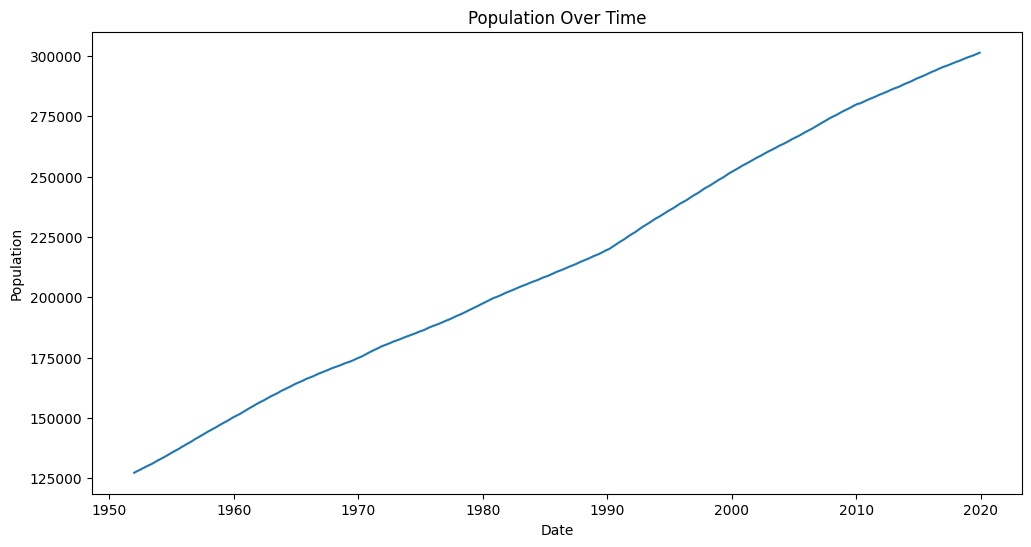

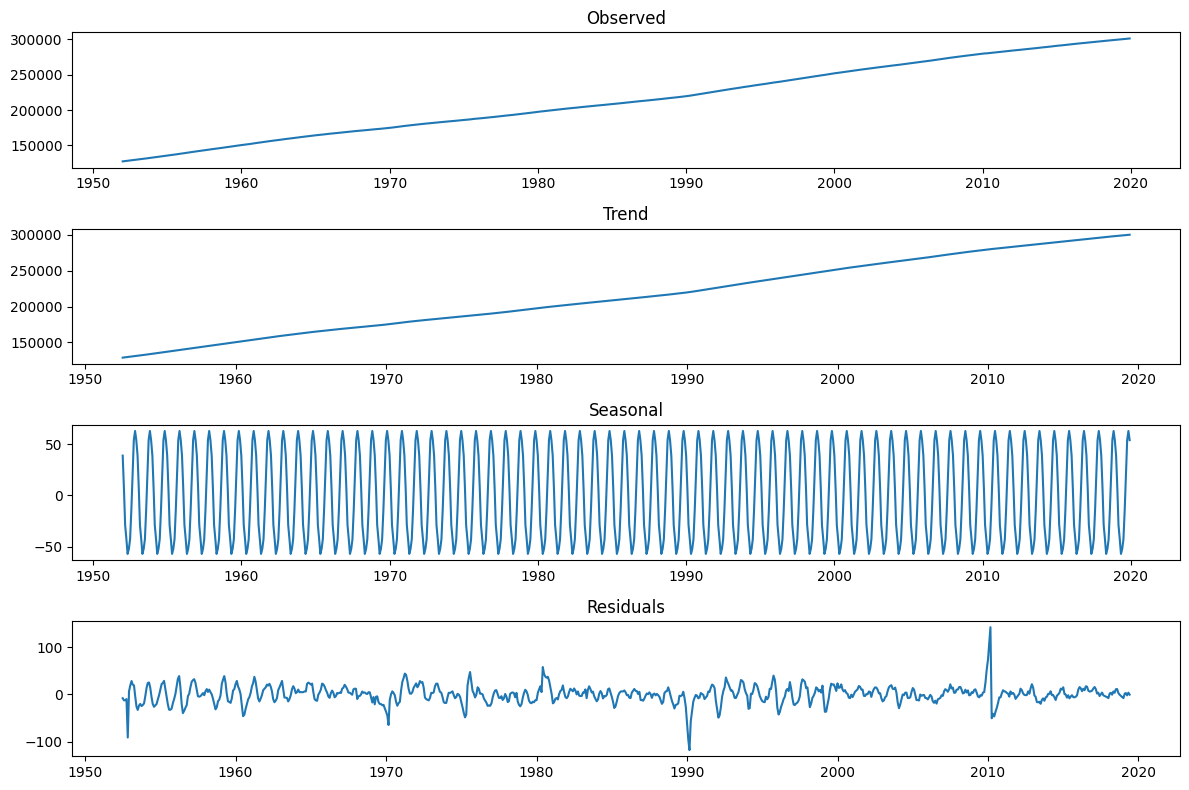

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

population_data['date'] = pd.to_datetime(population_data['date'])

# EDA on time series
plt.figure(figsize=(12, 6))
plt.plot(population_data['date'], population_data['value'])
plt.title('Population Over Time')
plt.xlabel('Date')
plt.ylabel('Population')
plt.show()

# Decompose time series to find trends and seasonality
result = seasonal_decompose(population_data['value'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(population_data['date'], result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(population_data['date'], result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(population_data['date'], result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(population_data['date'], result.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

